<a href="https://colab.research.google.com/github/rita-milani/data_science_na_pratica/blob/master/Covid_Daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Covid-19 Analysis**

## **Importing libraries and data**

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importing the .csv file
path = "https://raw.githubusercontent.com/rita-milani/data_science_na_pratica/master/covid_19.csv"
df = pd.read_csv(path, parse_dates=True)

In [3]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,31/03/2020,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
1,30/03/2020,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
2,29/03/2020,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
3,28/03/2020,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
4,27/03/2020,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0


## **Preparing the database**

We need to:
- **check** if all the numerical variables are `int64`or `float`
- **adjust the date** for `datetime` format and assign it to the **index**
- **remove the columns** we don´t need
- **rename** the columns for shorter names

In [4]:
df.dtypes

dateRep                     object
day                          int64
month                        int64
year                         int64
cases                        int64
deaths                       int64
countriesAndTerritories     object
geoId                       object
countryterritoryCode        object
popData2018                float64
dtype: object

In [0]:
# change dateRep to datetime format and assign it to index
df.index = pd.to_datetime(df.dateRep, format="%d/%m/%Y")

# drop dateRep column
df.drop(['dateRep', 'day', 'month', 'year'], axis=1, inplace=True)

# rename columns
df = df.rename(columns = {'countriesAndTerritories':'countries', 'geoId':'ID', 
                          'countryterritoryCode':'code', 'popData2018':'pop2018'})
df.index.names = ['date']


In [6]:
df.head()

,cases,deaths,countries,ID,code,pop2018
date,,,,,,
2020-03-31,27,0,Afghanistan,AF,AFG,37172386.0
2020-03-30,8,1,Afghanistan,AF,AFG,37172386.0
2020-03-29,15,1,Afghanistan,AF,AFG,37172386.0
2020-03-28,16,1,Afghanistan,AF,AFG,37172386.0
2020-03-27,0,0,Afghanistan,AF,AFG,37172386.0


In [7]:
df.index.dtype

dtype('<M8[ns]')

### Which are the affected countries?

In [8]:
# countries list
df.countries.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra', 'Algeria',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia_and_Herzegovina', 'Brazil',
       'British_Virgin_Islands', 'Brunei_Darussalam', 'Bulgaria',
       'Burkina_Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech_Republic',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Falkland_Islands_(Malvinas)'

## ***Covid-19: Cases***
## Daily Cases by Country - Dataframe


In [9]:
# creating a pivot table to separate daily cases by country
pv_cases = pd.pivot_table(df, values=['cases'], index='date', columns='countries' )
pv_cases.tail()

cases                  ...                        
countries  Afghanistan Albania Algeria  ... Vietnam Zambia Zimbabwe
date                                    ...                        
2020-03-27         0.0    28.0    41.0  ...     5.0    2.0      0.0
2020-03-28        16.0    12.0     0.0  ...    16.0    2.0      2.0
2020-03-29        15.0    11.0   104.0  ...    54.0   12.0      2.0
2020-03-30         8.0    15.0    45.0  ...     5.0    1.0      0.0
2020-03-31        27.0    11.0    57.0  ...     1.0    6.0      0.0

[5 rows x 199 columns]

### Converting pivot table to dataframe

- if we continue to work with **pivot table**, other commands, as `.loc`, will **not recognize correctly columns and rows**, as it can only read `cases` and `countries` as columns and rows.
- to **return to dataframe shape**, we use:
    - `droplevel()`
    - `df.columns.name=None`. 

In [10]:
# removing 'cases' and 'countries' columns names
pv_cases.columns = pv_cases.columns.droplevel(0)
pv_cases.columns.name = None
pv_cases.tail()

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia_and_Herzegovina,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,Central_African_Republic,Chad,Chile,China,...,Saudi_Arabia,Senegal,Serbia,Seychelles,Singapore,Sint_Maarten,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-27,0.0,28.0,41.0,36.0,1.0,2.0,4.0,87.0,39.0,9.0,367.0,1141.0,29.0,4.0,39.0,9.0,6.0,0.0,1298.0,0.0,1.0,9.0,0.0,22.0,0.0,482.0,2.0,7.0,22.0,32.0,2.0,16.0,633.0,1.0,NaN,3.0,1.0,2.0,164.0,94.0,...,112.0,6.0,81.0,0.0,26.0,0.0,10.0,49.0,1.0,218.0,91.0,NaN,8578.0,4.0,0.0,0.0,296.0,1000.0,4.0,17.0,91.0,0.0,1.0,5.0,0.0,1196.0,1.0,0.0,43.0,0.0,2129.0,1.0,0.0,16797.0,21.0,18.0,1.0,5.0,2.0,0.0
2020-03-28,16.0,12.0,0.0,43.0,1.0,0.0,0.0,101.0,43.0,0.0,212.0,668.0,43.0,0.0,8.0,0.0,0.0,8.0,1049.0,0.0,0.0,2.0,0.0,13.0,48.0,502.0,0.0,1.0,29.0,0.0,4.0,0.0,671.0,0.0,NaN,2.0,0.0,0.0,304.0,119.0,...,92.0,14.0,73.0,0.0,138.0,1.0,69.0,55.0,1.0,243.0,146.0,NaN,7871.0,0.0,0.0,0.0,240.0,1390.0,0.0,15.0,0.0,0.0,1.0,1.0,54.0,2069.0,0.0,0.0,62.0,72.0,2885.0,0.0,2.0,18695.0,0.0,21.0,12.0,16.0,2.0,2.0
2020-03-29,15.0,11.0,104.0,41.0,0.0,0.0,0.0,55.0,52.0,0.0,431.0,594.0,17.0,2.0,7.0,0.0,2.0,0.0,1850.0,0.0,0.0,5.0,1.0,7.0,28.0,487.0,0.0,5.0,38.0,34.0,1.0,11.0,697.0,0.0,NaN,0.0,1.0,0.0,299.0,113.0,...,99.0,11.0,202.0,0.0,71.0,0.0,0.0,59.0,0.0,17.0,105.0,NaN,8189.0,9.0,2.0,0.0,401.0,1048.0,0.0,16.0,109.0,0.0,3.0,8.0,0.0,1704.0,3.0,16.0,93.0,63.0,2546.0,0.0,3.0,19979.0,66.0,29.0,0.0,54.0,12.0,2.0
2020-03-30,8.0,15.0,45.0,26.0,3.0,0.0,0.0,75.0,0.0,22.0,284.0,522.0,27.0,3.0,27.0,1.0,7.0,0.0,1702.0,0.0,0.0,0.0,0.0,15.0,66.0,352.0,0.0,6.0,15.0,0.0,4.0,0.0,869.0,0.0,NaN,0.0,0.0,0.0,230.0,98.0,...,26.0,12.0,82.0,1.0,41.0,0.0,41.0,39.0,0.0,93.0,78.0,NaN,6549.0,5.0,0.0,0.0,253.0,1122.0,4.0,23.0,143.0,0.0,2.0,4.0,51.0,1815.0,0.0,3.0,107.0,0.0,2433.0,1.0,8.0,18360.0,5.0,12.0,0.0,5.0,1.0,0.0
2020-03-31,27.0,11.0,57.0,36.0,0.0,0.0,0.0,146.0,58.0,NaN,464.0,805.0,64.0,0.0,15.0,0.0,1.0,11.0,1063.0,1.0,0.0,5.0,0.0,11.0,30.0,323.0,1.0,1.0,13.0,42.0,2.0,43.0,1169.0,0.0,NaN,4.0,0.0,2.0,310.0,84.0,...,224.0,20.0,0.0,2.0,0.0,NaN,0.0,33.0,0.0,46.0,125.0,1.0,6398.0,0.0,1.0,0.0,328.0,1138.0,1.0,0.0,263.0,0.0,4.0,7.0,34.0,2318.0,0.0,0.0,62.0,143.0,2619.0,5.0,NaN,21595.0,11.0,4.0,16.0,1.0,6.0,0.0


## Daily New Cases by Selected Countries - Chart 

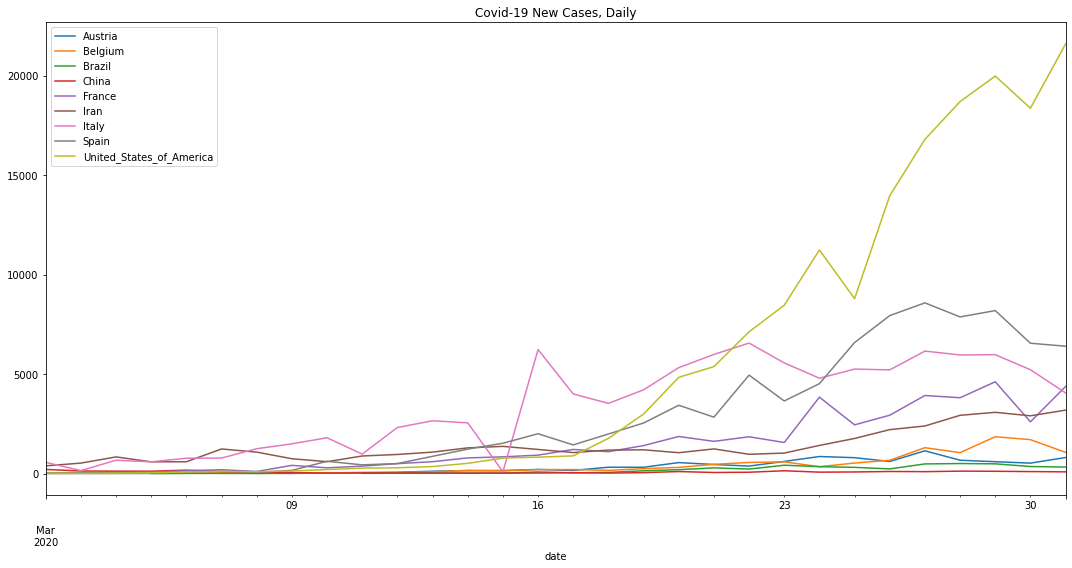

In [11]:
# plotting new cases
fig, ax = plt.subplots(figsize=(15,8))

pv_cases.loc['2020-03-02': , ['Austria', 'Belgium', 'Brazil', 'China', 'France', 
                                         'Iran', 'Italy', 'Spain', 'United_States_of_America']].plot(kind='line', ax=ax)

ax.set_title('Covid-19 New Cases, Daily')

plt.tight_layout()

## Total Cases - Dataframe

In [12]:
# pivot table to calculate total cases
pv_total_cases = pd.pivot_table(df, index='countries', values='cases', aggfunc='sum').sort_values(by='cases', ascending=False)
display(pv_total_cases)

,cases
countries,
United_States_of_America,164620
Italy,101739
Spain,85195
China,82241
Germany,61913
...,...
Papua_New_Guinea,1
South_Sudan,1
Timor_Leste,1


## Total Cases - Chart

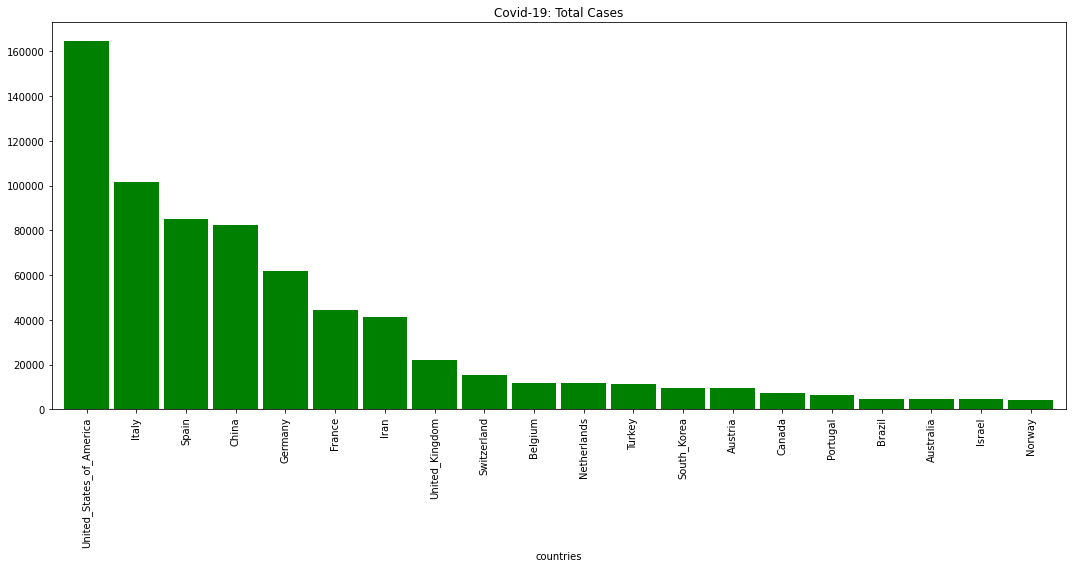

In [13]:
fig, ax = plt.subplots(figsize=(15,8))

pv_total_cases.iloc[0:20, 0].plot(kind='bar', color='g', width=0.9, ax=ax)

ax.set_title('Covid-19: Total Cases')

plt.tight_layout()

## ***Covid-19 Deaths***
## Daily Deceased by Country - Dataframe

In [14]:
# creating a pivot table for daily death figures
pv_deaths = pd.pivot_table(df, index='date', values='deaths', columns='countries')
pv_deaths.tail()

countries,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia_and_Herzegovina,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,Central_African_Republic,Chad,Chile,China,...,Saudi_Arabia,Senegal,Serbia,Seychelles,Singapore,Sint_Maarten,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-27,0.0,1.0,4.0,3.0,0.0,0.0,0.0,4.0,1.0,0.0,2.0,18.0,1.0,0.0,1.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,NaN,0.0,0.0,0.0,1.0,5.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,8.0,NaN,655.0,0.0,0.0,0.0,24.0,58.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,1.0,0.0,115.0,0.0,0.0,246.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-03-28,1.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,NaN,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,NaN,769.0,0.0,0.0,0.0,26.0,36.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,181.0,0.0,0.0,411.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-29,1.0,1.0,5.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,2.0,22.0,0.0,1.0,4.0,6.0,0.0,1.0,7.0,0.0,NaN,0.0,0.0,0.0,1.0,5.0,...,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,NaN,832.0,1.0,0.0,0.0,10.0,38.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,3.0,0.0,260.0,1.0,0.0,484.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-03-30,1.0,0.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,3.0,1.0,22.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,2.0,...,4.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,NaN,838.0,0.0,0.0,0.0,8.0,22.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,23.0,0.0,0.0,1.0,0.0,209.0,0.0,0.0,318.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-03-31,0.0,2.0,2.0,2.0,0.0,0.0,0.0,4.0,0.0,NaN,3.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,3.0,2.0,23.0,0.0,0.0,0.0,3.0,0.0,0.0,28.0,0.0,NaN,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,5.0,0.0,812.0,0.0,1.0,0.0,36.0,38.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,2.0,3.0,180.0,0.0,NaN,661.0,0.0,1.0,2.0,0.0,0.0,0.0


## Daily Deceased by Selected Countries - Chart

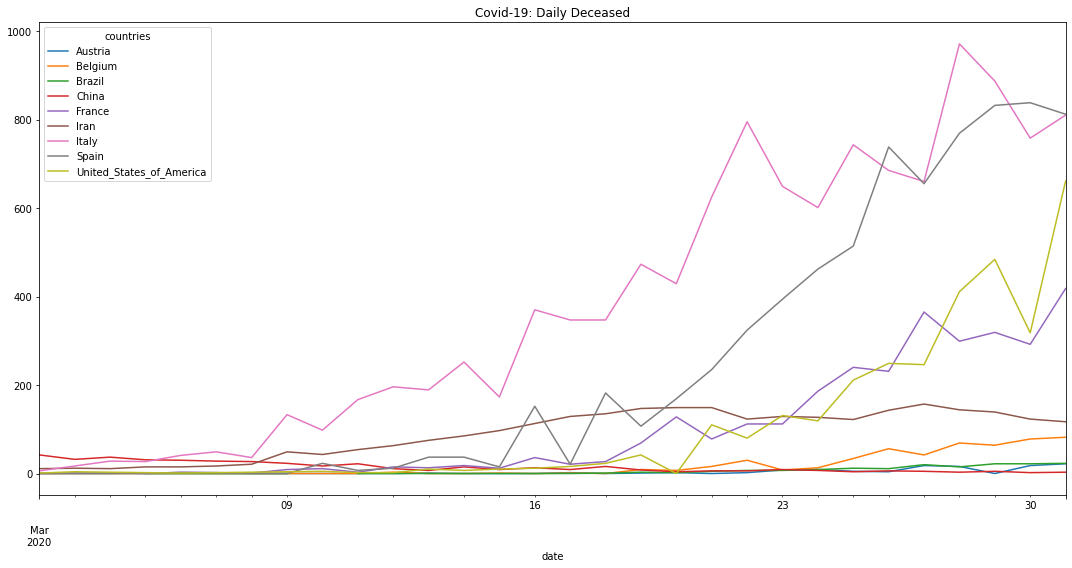

In [15]:
# plotting daily deceased graph
fig, ax = plt.subplots(figsize=(15,8))

pv_deaths.loc['2020-03-02': , ['Austria', 'Belgium', 'Brazil', 'China', 'France', 
                                         'Iran', 'Italy', 'Spain', 'United_States_of_America']].plot(kind='line', ax=ax)

ax.set_title('Covid-19: Daily Deceased')

plt.tight_layout()

## Total Deceased by Country - Dataframe

In [16]:
# creating a pivot table to calculate total deaths by country
pv_total_deaths = pd.pivot_table(df, values='deaths', index='countries', aggfunc=sum).sort_values(by='deaths', ascending=False)
display(pv_total_deaths)

,deaths
countries,
Italy,11591
Spain,7340
China,3309
United_States_of_America,3170
France,3024
...,...
Kyrgyzstan,0
Oman,0
Laos,0


## Total Deceased by Country - Chart

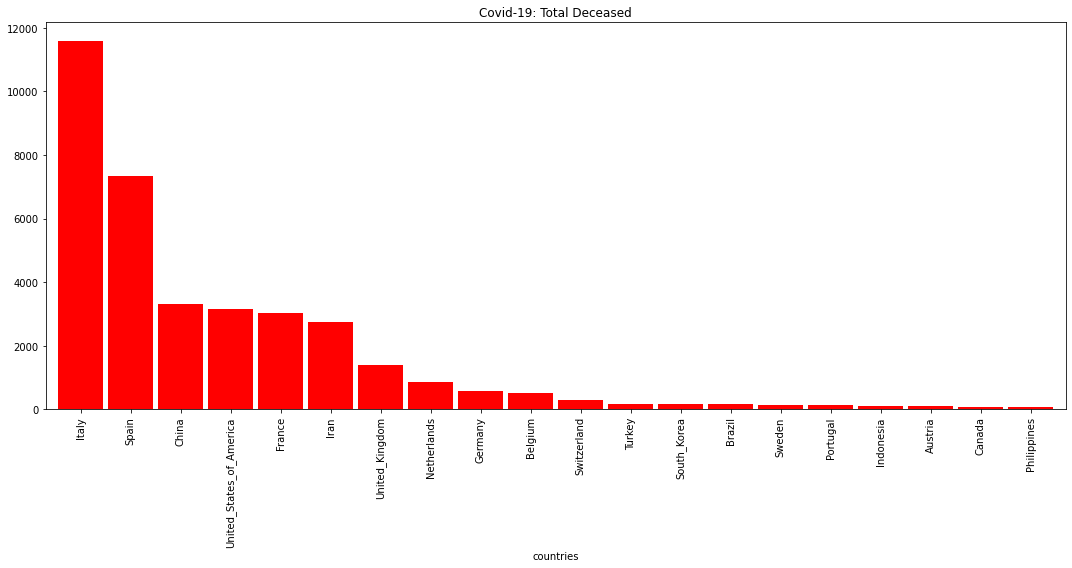

In [17]:
fig, ax = plt.subplots(figsize=(15,8))

pv_total_deaths.iloc[0:20, 0].plot(kind='bar', color='r', width=0.9, ax=ax)

ax.set_title('Covid-19: Total Deceased')

plt.tight_layout()

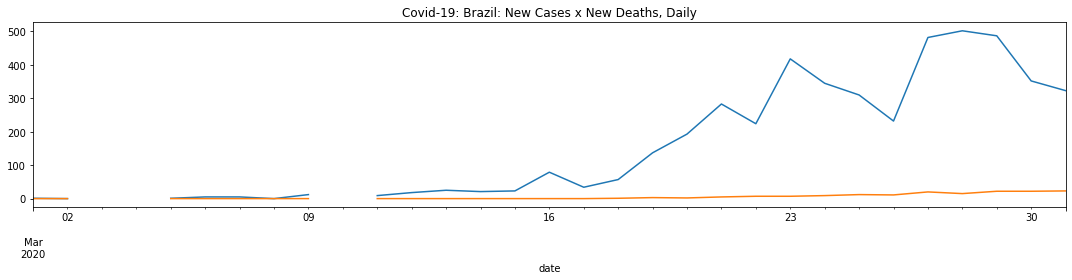

In [18]:
fig, ax = plt.subplots(figsize=(15,4))

pv_cases.loc['2020-03-01': , 'Brazil'].plot(kind='line', ax=ax)
pv_deaths.loc['2020-03-01':, 'Brazil'].plot(kind='line', ax=ax)

ax.set_title('Covid-19: Brazil: New Cases x New Deaths, Daily')

plt.tight_layout()